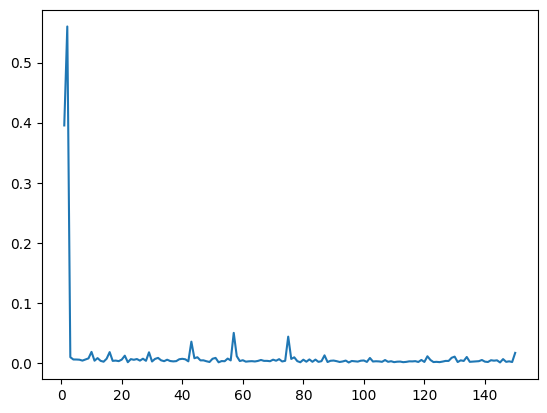

In [41]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df=pandas.read_csv(r'E:\Study\Python\the_third_course\temperature_dataset.csv')
data=np.array(df)
learning_rate=0.1
m_train=3000
m_test=np.shape(data)[0]-3000
epochs=1
batch_size=20
rng=np.random.default_rng(1)
m_all=data.shape[0]
d=data.shape[1]-1

x_mean=np.mean(data[:,1:],axis=0)
x_std=np.std(data[:,1:],axis=0,ddof=1)
data[:,1:]=(data[:,1:]-x_mean)/x_std
x_train=data[:m_train,1:].T
x_test=data[m_train:,1:].T
y_train=data[0:m_train,0].reshape(1,-1)
y_test=data[m_train:,0].reshape(1,-1)
w=np.zeros((d,1)).reshape(-1,1)
b=0
train_set=data[0:m_train,:]
cost_saved=[]






for epoch in range(0,epochs):
    rng.shuffle(train_set)
    for start_sample in range(0,m_train,batch_size):
        batch_sample=min([batch_size,m_train-start_sample])
        v=np.ones((1,batch_sample)).reshape(-1,1)
        x=train_set[start_sample:batch_sample+start_sample,1:].T
        y=train_set[start_sample:batch_sample+start_sample,1].T
        y_hat=np.dot(w.T,x)+b
        e=y_hat-y
        w=w-2*learning_rate*np.dot(x,e.T)/batch_size
        b=b-2*learning_rate*np.dot(e,v)/batch_size
        cost=np.dot(e,e.T)/batch_size
        cost_saved.append(cost.item(0))
        
y_hat_train=np.dot(w.T,x_train)+b*v
e=y_hat_train-y_train
mse_train=np.dot(e,e.T)/m_train


y_hat_test=np.dot(w.T,x_test)+b
e=y_hat_test-y_test
mse_test=np.sqrt(np.dot(e,e.T)/m_test)


plt.plot(range(1,np.size(cost_saved)+1),cost_saved)
plt.show()
    